In [1]:
import findspark
findspark.init()

import pyspark # only run after findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

df = spark.sql('''select 'spark' as hello ''')
df.show()

+-----+
|hello|
+-----+
|spark|
+-----+



In [2]:
spark

In [3]:
sc=spark.sparkContext

In [4]:
#Load the data
rdd=sc.textFile('CaliforniaHousing//cal_housing.data')

In [5]:
#load the header
header=sc.textFile('CaliforniaHousing//cal_housing.domain')

In [6]:
header.collect()

['longitude: continuous.',
 'latitude: continuous.',
 'housingMedianAge: continuous. ',
 'totalRooms: continuous. ',
 'totalBedrooms: continuous. ',
 'population: continuous. ',
 'households: continuous. ',
 'medianIncome: continuous. ',
 'medianHouseValue: continuous. ']

In [8]:
rdd.take(2)

['-122.230000,37.880000,41.000000,880.000000,129.000000,322.000000,126.000000,8.325200,452600.000000',
 '-122.220000,37.860000,21.000000,7099.000000,1106.000000,2401.000000,1138.000000,8.301400,358500.000000']

In [9]:
rdd=rdd.map(lambda line: line.split(",")) #split lines on commas

In [10]:
rdd.take(2)

[['-122.230000',
  '37.880000',
  '41.000000',
  '880.000000',
  '129.000000',
  '322.000000',
  '126.000000',
  '8.325200',
  '452600.000000'],
 ['-122.220000',
  '37.860000',
  '21.000000',
  '7099.000000',
  '1106.000000',
  '2401.000000',
  '1138.000000',
  '8.301400',
  '358500.000000']]

In [11]:
rdd.first()

['-122.230000',
 '37.880000',
 '41.000000',
 '880.000000',
 '129.000000',
 '322.000000',
 '126.000000',
 '8.325200',
 '452600.000000']

In [12]:
rdd.top(2)

[['-124.350000',
  '40.540000',
  '52.000000',
  '1820.000000',
  '300.000000',
  '806.000000',
  '270.000000',
  '3.014700',
  '94600.000000'],
 ['-124.300000',
  '41.840000',
  '17.000000',
  '2677.000000',
  '531.000000',
  '1244.000000',
  '456.000000',
  '3.031300',
  '103600.000000']]

In [13]:
from pyspark.sql import Row
#RDD to a Df
df=rdd.map(lambda line: Row(longitude=line[0],
                           latitude=line[1],
                           housingMedianAge=line[2],
                           totalRooms=line[3],
                           totalBedRooms=line[4],
                           population=line[5],
                           households=line[6],
                           medianIncome=line[7],
                           medianHouseValue=line[8])).toDF()

In [14]:
df.show()

+-----------+---------+----------------+-----------+-------------+-----------+-----------+------------+----------------+
|  longitude| latitude|housingMedianAge| totalRooms|totalBedRooms| population| households|medianIncome|medianHouseValue|
+-----------+---------+----------------+-----------+-------------+-----------+-----------+------------+----------------+
|-122.230000|37.880000|       41.000000| 880.000000|   129.000000| 322.000000| 126.000000|    8.325200|   452600.000000|
|-122.220000|37.860000|       21.000000|7099.000000|  1106.000000|2401.000000|1138.000000|    8.301400|   358500.000000|
|-122.240000|37.850000|       52.000000|1467.000000|   190.000000| 496.000000| 177.000000|    7.257400|   352100.000000|
|-122.250000|37.850000|       52.000000|1274.000000|   235.000000| 558.000000| 219.000000|    5.643100|   341300.000000|
|-122.250000|37.850000|       52.000000|1627.000000|   280.000000| 565.000000| 259.000000|    3.846200|   342200.000000|
|-122.250000|37.850000|       52

In [15]:
df.columns

['longitude',
 'latitude',
 'housingMedianAge',
 'totalRooms',
 'totalBedRooms',
 'population',
 'households',
 'medianIncome',
 'medianHouseValue']

In [16]:
df.dtypes

[('longitude', 'string'),
 ('latitude', 'string'),
 ('housingMedianAge', 'string'),
 ('totalRooms', 'string'),
 ('totalBedRooms', 'string'),
 ('population', 'string'),
 ('households', 'string'),
 ('medianIncome', 'string'),
 ('medianHouseValue', 'string')]

In [17]:
df.printSchema()

root
 |-- longitude: string (nullable = true)
 |-- latitude: string (nullable = true)
 |-- housingMedianAge: string (nullable = true)
 |-- totalRooms: string (nullable = true)
 |-- totalBedRooms: string (nullable = true)
 |-- population: string (nullable = true)
 |-- households: string (nullable = true)
 |-- medianIncome: string (nullable = true)
 |-- medianHouseValue: string (nullable = true)



In [18]:
#change the dtype of the columns
from pyspark.sql.types import *

def convertCol(df,names,newType):
    for i in names:
        df=df.withColumn(i,df[i].cast(newType))
    return df

columns=df.columns
df=convertCol(df,columns,FloatType())

In [19]:
df.printSchema()

root
 |-- longitude: float (nullable = true)
 |-- latitude: float (nullable = true)
 |-- housingMedianAge: float (nullable = true)
 |-- totalRooms: float (nullable = true)
 |-- totalBedRooms: float (nullable = true)
 |-- population: float (nullable = true)
 |-- households: float (nullable = true)
 |-- medianIncome: float (nullable = true)
 |-- medianHouseValue: float (nullable = true)



In [20]:
df.select('population','totalBedRooms').show(10)

+----------+-------------+
|population|totalBedRooms|
+----------+-------------+
|     322.0|        129.0|
|    2401.0|       1106.0|
|     496.0|        190.0|
|     558.0|        235.0|
|     565.0|        280.0|
|     413.0|        213.0|
|    1094.0|        489.0|
|    1157.0|        687.0|
|    1206.0|        665.0|
|    1551.0|        707.0|
+----------+-------------+
only showing top 10 rows



In [21]:
df.groupBy('housingMedianAge').count().sort("housingMedianAge",ascending=False).show()

+----------------+-----+
|housingMedianAge|count|
+----------------+-----+
|            52.0| 1273|
|            51.0|   48|
|            50.0|  136|
|            49.0|  134|
|            48.0|  177|
|            47.0|  198|
|            46.0|  245|
|            45.0|  294|
|            44.0|  356|
|            43.0|  353|
|            42.0|  368|
|            41.0|  296|
|            40.0|  304|
|            39.0|  369|
|            38.0|  394|
|            37.0|  537|
|            36.0|  862|
|            35.0|  824|
|            34.0|  689|
|            33.0|  615|
+----------------+-----+
only showing top 20 rows



In [22]:
df.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
longitude,20640,-119.56970444871473,2.0035317429328914,-124.35,-114.31
latitude,20640,35.63186143109965,2.1359523806029554,32.54,41.95
housingMedianAge,20640,28.639486434108527,12.585557612111613,1.0,52.0
totalRooms,20640,2635.7630813953488,2181.6152515827994,2.0,39320.0
totalBedRooms,20640,537.8980135658915,421.2479059431315,1.0,6445.0
population,20640,1425.4767441860465,1132.4621217653385,3.0,35682.0
households,20640,499.5396802325581,382.32975283161136,1.0,6082.0
medianIncome,20640,3.8706710030346416,1.8998217183639672,0.4999,15.0001
medianHouseValue,20640,206855.81690891474,115395.61587441381,14999.0,500001.0


In [23]:
from pyspark.sql import functions as F

In [24]:
df.select([F.count(F.when(F.isnan(c)| F.col(c).isNull(),c)).alias(c) for c in df.columns]).show() #no.of missing values

+---------+--------+----------------+----------+-------------+----------+----------+------------+----------------+
|longitude|latitude|housingMedianAge|totalRooms|totalBedRooms|population|households|medianIncome|medianHouseValue|
+---------+--------+----------------+----------+-------------+----------+----------+------------+----------------+
|        0|       0|               0|         0|            0|         0|         0|           0|               0|
+---------+--------+----------------+----------+-------------+----------+----------+------------+----------------+



In [25]:
import six
for i in df.columns:
    if not(isinstance(df.select(i).take(1)[0][0],six.string_types)):
        print("Correlation with medianHouseValue for ",i,df.stat.corr('medianHouseValue',i))

Correlation with medianHouseValue for  longitude -0.04596662870931127
Correlation with medianHouseValue for  latitude -0.14416027126511122
Correlation with medianHouseValue for  housingMedianAge 0.10562341249321103
Correlation with medianHouseValue for  totalRooms 0.1341531138065622
Correlation with medianHouseValue for  totalBedRooms 0.050593788812066755
Correlation with medianHouseValue for  population -0.024649678888895063
Correlation with medianHouseValue for  households 0.06584265057005644
Correlation with medianHouseValue for  medianIncome 0.688075207464696
Correlation with medianHouseValue for  medianHouseValue 1.0


In [26]:
#preprocessing
from pyspark.sql.functions import *
df=df.withColumn("medianHouseValue",col("medianHouseValue")/100000) #adjust the values
df.take(2)

[Row(longitude=-122.2300033569336, latitude=37.880001068115234, housingMedianAge=41.0, totalRooms=880.0, totalBedRooms=129.0, population=322.0, households=126.0, medianIncome=8.325200080871582, medianHouseValue=4.526),
 Row(longitude=-122.22000122070312, latitude=37.86000061035156, housingMedianAge=21.0, totalRooms=7099.0, totalBedRooms=1106.0, population=2401.0, households=1138.0, medianIncome=8.301400184631348, medianHouseValue=3.585)]

In [27]:
#feature engineering
roomsPerHousehold=df.select(col("totalRooms")/col("households"))
populationPerHousehold=df.select(col("population")/col("houseHolds"))
bedroomsPerRoom=df.select(col("totalBedRooms")/col("totalRooms"))
df=df.withColumn("roomsPerHousehold",col("totalRooms")/col("households")).withColumn("populationPerHousehold",col("population")/col("houseHolds")).withColumn("bedroomsPerRoom",col("totalBedRooms")/col("totalRooms"))
df.first()

Row(longitude=-122.2300033569336, latitude=37.880001068115234, housingMedianAge=41.0, totalRooms=880.0, totalBedRooms=129.0, population=322.0, households=126.0, medianIncome=8.325200080871582, medianHouseValue=4.526, roomsPerHousehold=6.984126984126984, populationPerHousehold=2.5555555555555554, bedroomsPerRoom=0.14659090909090908)

In [28]:
df.columns

['longitude',
 'latitude',
 'housingMedianAge',
 'totalRooms',
 'totalBedRooms',
 'population',
 'households',
 'medianIncome',
 'medianHouseValue',
 'roomsPerHousehold',
 'populationPerHousehold',
 'bedroomsPerRoom']

In [29]:
len(df.columns)

12

In [30]:
#re-order the columns
df=df.select("medianHouseValue",
            "longitude",
            "latitude",
            "totalRooms",
            "housingMedianAge",
            "totalBedRooms",
            "population",
            "households",
            "medianIncome",
            "roomsPerHousehold",
            "populationPerHousehold",
            "bedroomsPerRoom")

In [31]:
df.show()

+----------------+---------+--------+----------+----------------+-------------+----------+----------+------------+------------------+----------------------+-------------------+
|medianHouseValue|longitude|latitude|totalRooms|housingMedianAge|totalBedRooms|population|households|medianIncome| roomsPerHousehold|populationPerHousehold|    bedroomsPerRoom|
+----------------+---------+--------+----------+----------------+-------------+----------+----------+------------+------------------+----------------------+-------------------+
|           4.526|  -122.23|   37.88|     880.0|            41.0|        129.0|     322.0|     126.0|      8.3252| 6.984126984126984|    2.5555555555555554|0.14659090909090908|
|           3.585|  -122.22|   37.86|    7099.0|            21.0|       1106.0|    2401.0|    1138.0|      8.3014| 6.238137082601054|     2.109841827768014|0.15579659106916466|
|           3.521|  -122.24|   37.85|    1467.0|            52.0|        190.0|     496.0|     177.0|      7.2574| 

In [32]:
from pyspark.ml.linalg import DenseVector
input_data=df.rdd.map(lambda x: (x[0],DenseVector(x[1:])))

In [33]:
df=spark.createDataFrame(input_data,["label","features"])

In [34]:
df.take(2)

[Row(label=4.526, features=DenseVector([-122.23, 37.88, 880.0, 41.0, 129.0, 322.0, 126.0, 8.3252, 6.9841, 2.5556, 0.1466])),
 Row(label=3.585, features=DenseVector([-122.22, 37.86, 7099.0, 21.0, 1106.0, 2401.0, 1138.0, 8.3014, 6.2381, 2.1098, 0.1558]))]

In [35]:
from pyspark.ml.feature import StandardScaler
standardScaler=StandardScaler(inputCol="features",outputCol="features_scaled")
scaler=standardScaler.fit(df)
scaled_df=scaler.transform(df)
scaled_df.take(2)

[Row(label=4.526, features=DenseVector([-122.23, 37.88, 880.0, 41.0, 129.0, 322.0, 126.0, 8.3252, 6.9841, 2.5556, 0.1466]), features_scaled=DenseVector([-61.0073, 17.7345, 0.4034, 3.2577, 0.3062, 0.2843, 0.3296, 4.3821, 2.8228, 0.2461, 2.5264])),
 Row(label=3.585, features=DenseVector([-122.22, 37.86, 7099.0, 21.0, 1106.0, 2401.0, 1138.0, 8.3014, 6.2381, 2.1098, 0.1558]), features_scaled=DenseVector([-61.0023, 17.7251, 3.254, 1.6686, 2.6255, 2.1202, 2.9765, 4.3696, 2.5213, 0.2031, 2.6851]))]

In [36]:
#split the data into train and test sets
train_data, test_data =scaled_df.randomSplit([.8,.2],seed=1234)

In [37]:
train_data.take(1)

[Row(label=0.14999, features=DenseVector([-122.74, 39.71, 255.0, 16.0, 73.0, 85.0, 38.0, 1.6607, 6.7105, 2.2368, 0.2863]), features_scaled=DenseVector([-61.2618, 18.5912, 0.1169, 1.2713, 0.1733, 0.0751, 0.0994, 0.8741, 2.7122, 0.2154, 4.9338]))]

### DecisionTree Regression Model

In [38]:
from pyspark.ml.regression import DecisionTreeRegressor

In [39]:
dtr=DecisionTreeRegressor().setFeaturesCol("features_scaled").setLabelCol("label")

In [69]:
#Train the model using our training data
model = dtr.fit(train_data)

In [70]:
# Now see if we can predict values in our test data.
# Generate predictions using our decision tree model for all features in our
# test dataframe:
fullPredictions = model.transform(test_data)

In [71]:
fullPredictions.show(5)

+-------+--------------------+--------------------+------------------+
|  label|            features|     features_scaled|        prediction|
+-------+--------------------+--------------------+------------------+
|0.14999|[-117.86000061035...|[-58.826120936731...| 2.624081197183098|
|  0.225|[-122.31999969482...|[-61.052189527960...|1.2658964307004468|
|  0.388|[-118.27999877929...|[-59.035749843499...|1.2639939019407558|
|  0.394|[-119.01000213623...|[-59.400108112096...|0.8946262471042472|
|  0.396|[-119.79000091552...|[-59.789420026942...|1.2639939019407558|
+-------+--------------------+--------------------+------------------+
only showing top 5 rows



In [73]:
from pyspark.ml.evaluation import RegressionEvaluator
dtr_evaluator=RegressionEvaluator(labelCol="label",predictionCol="prediction",metricName="rmse")
rmse=dtr_evaluator.evaluate(fullPredictions)
print("RMSE on test data : " + str(rmse))

RMSE on test data : 0.7311896126014615


In [72]:
dtr_evaluator=RegressionEvaluator(labelCol="label",predictionCol="prediction",metricName="r2")
r2=dtr_evaluator.evaluate(fullPredictions)
print("R2 on test data : " + str(r2))

R2 on test data : 0.6075194439703525


In [44]:
model.featureImportances

SparseVector(11, {0: 0.0013, 1: 0.0162, 2: 0.0018, 3: 0.0486, 6: 0.0011, 7: 0.7731, 8: 0.0235, 9: 0.1287, 10: 0.0056})

### Gradient booseted tree regression

In [74]:
from pyspark.ml.regression import GBTRegressor
gbt=GBTRegressor(featuresCol='features_scaled',labelCol='label',maxIter=10)
gbt_model=gbt.fit(train_data)
gbt_predictions=gbt_model.transform(test_data)
gbt_predictions.select('prediction','label','features_scaled').show(5)

+------------------+-------+--------------------+
|        prediction|  label|     features_scaled|
+------------------+-------+--------------------+
| 2.761729499051332|0.14999|[-58.826120936731...|
|1.6176264162262441|  0.225|[-61.052189527960...|
|1.5442129451179691|  0.388|[-59.035749843499...|
|0.6291957176699126|  0.394|[-59.400108112096...|
|1.1861413230449218|  0.396|[-59.789420026942...|
+------------------+-------+--------------------+
only showing top 5 rows



In [46]:
gbt_evaluator=RegressionEvaluator(labelCol="label",predictionCol="prediction",metricName="rmse")
rmse=gbt_evaluator.evaluate(gbt_predictions)
print("RMSE on test data : " + str(rmse))

RMSE on test data : 0.6267590507861218


In [75]:
gbt_evaluator=RegressionEvaluator(labelCol="label",predictionCol="prediction",metricName="r2")
r2=gbt_evaluator.evaluate(gbt_predictions)
print("R2 on test data : " + str(r2))

R2 on test data : 0.7116238441669577


In [47]:
# Extract the predictions and the "known" correct labels.
predictions = gbt_predictions.select("prediction").rdd.map(lambda x: x[0])
labels = gbt_predictions.select("label").rdd.map(lambda x: x[0])

In [48]:
predictionAndLabel = predictions.zip(labels).collect()

In [49]:
predictionAndLabel[:10]

[(2.761729499051332, 0.14999),
 (1.6176264162262441, 0.225),
 (1.5442129451179691, 0.388),
 (0.6291957176699126, 0.394),
 (1.1861413230449218, 0.396),
 (0.6979961318792283, 0.398),
 (0.7492325098385483, 0.4),
 (0.5481896714763442, 0.431),
 (0.727538484650756, 0.44),
 (0.6291957176699126, 0.441)]

### Multi Linear Regression Model

In [50]:
from pyspark.ml.regression import LinearRegression
lr=LinearRegression(featuresCol="features_scaled",labelCol="label",maxIter=10,regParam=0.3,elasticNetParam=0.8)
linearModel=lr.fit(train_data)

In [51]:
print("Coefficients : " + str(linearModel.coefficients))

Coefficients : [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.526282294549046,0.0,0.0,0.0]


In [52]:
print("Intercept : " + str(linearModel.intercept))

Intercept : 0.9916505016471527


In [53]:
train_summary=linearModel.summary
print("RMSE : " + str(train_summary.rootMeanSquaredError))
print("R^2 : "+ str(train_summary.r2))

RMSE : 0.8765426709359433
R^2 : 0.4195260943255117


In [54]:
lr_predicted=linearModel.transform(test_data)
lr_predicted.show(5)

+-------+--------------------+--------------------+------------------+
|  label|            features|     features_scaled|        prediction|
+-------+--------------------+--------------------+------------------+
|0.14999|[-117.86000061035...|[-58.826120936731...|2.1532368519840652|
|  0.225|[-122.31999969482...|[-61.052189527960...|1.7326700927043257|
|  0.388|[-118.27999877929...|[-59.035749843499...| 1.528370308475589|
|  0.394|[-119.01000213623...|[-59.400108112096...|1.4190595193689055|
|  0.396|[-119.79000091552...|[-59.789420026942...|1.2828781450668982|
+-------+--------------------+--------------------+------------------+
only showing top 5 rows



In [55]:
lr_evaluator=RegressionEvaluator(labelCol="label",predictionCol="prediction",metricName="r2")
r2=lr_evaluator.evaluate(lr_predicted)
print("R2 on test data : " + str(r2))

R2 on test data : 0.41955411933428455


In [56]:
test_res=linearModel.evaluate(test_data)
print("RMSE on test data " + str(test_res.rootMeanSquaredError))

RMSE on test data 0.8892048171311064


In [57]:
train_summary.residuals.show()

+-------------------+
|          residuals|
+-------------------+
|  -1.30170208288436|
| -1.423395491662186|
|-1.4722658468860856|
|-0.9790814961018388|
|-1.3631489881820185|
|-1.3308405819627116|
| -1.422669815482754|
|-1.0277271236909837|
|-1.7804791779356688|
|-0.9804163211371992|
|-1.1475876677649184|
|-1.2420729132629886|
| -1.263979423528471|
|-0.8829435852696769|
| -0.915130175001156|
|-1.4823276094349533|
| -1.234979423528471|
|-1.0974296820083211|
|-1.1415337734361293|
|-1.2027434879385477|
+-------------------+
only showing top 20 rows



In [58]:
# Extract the predictions and the "known" correct labels.
predictions = lr_predicted.select("prediction").rdd.map(lambda x: x[0])
labels = lr_predicted.select("label").rdd.map(lambda x: x[0])

In [59]:
predictionAndLabel = predictions.zip(labels).collect()

In [60]:
predictionAndLabel[:10]

[(2.1532368519840652, 0.14999),
 (1.7326700927043257, 0.225),
 (1.528370308475589, 0.388),
 (1.4190595193689055, 0.394),
 (1.2828781450668982, 0.396),
 (1.5209462515073842, 0.398),
 (1.457952674892025, 0.4),
 (1.3675344208193962, 0.431),
 (1.5854080289670214, 0.44),
 (1.3530741615594604, 0.441)]

### Random Forest Regression

In [61]:
from pyspark.ml.regression import RandomForestRegressor
rfr=RandomForestRegressor(featuresCol="features",labelCol="label") #default numtress is 20

In [76]:
rfr_model=rfr.fit(train_data)

In [77]:
rfr_predictions=rfr_model.transform(test_data)

In [78]:
rfr_predictions.show(5)

+-------+--------------------+--------------------+------------------+
|  label|            features|     features_scaled|        prediction|
+-------+--------------------+--------------------+------------------+
|0.14999|[-117.86000061035...|[-58.826120936731...| 2.198763031490297|
|  0.225|[-122.31999969482...|[-61.052189527960...|1.4407717579979225|
|  0.388|[-118.27999877929...|[-59.035749843499...|1.5178622443644791|
|  0.394|[-119.01000213623...|[-59.400108112096...|1.1574834989898448|
|  0.396|[-119.79000091552...|[-59.789420026942...|1.2583256436016137|
+-------+--------------------+--------------------+------------------+
only showing top 5 rows



In [65]:
rfr_evaluator=RegressionEvaluator(labelCol="label",predictionCol="prediction",metricName="rmse")
rmse=dtr_evaluator.evaluate(rfr_predictions)
print("RMSE on test data : " + str(rmse))

RMSE on test data : 0.7052755243995097


In [79]:
rfr_evaluator=RegressionEvaluator(labelCol="label",predictionCol="prediction",metricName="r2")
r2=dtr_evaluator.evaluate(rfr_predictions)
print("R2 on test data : " + str(r2))

R2 on test data : 0.7052755243995097


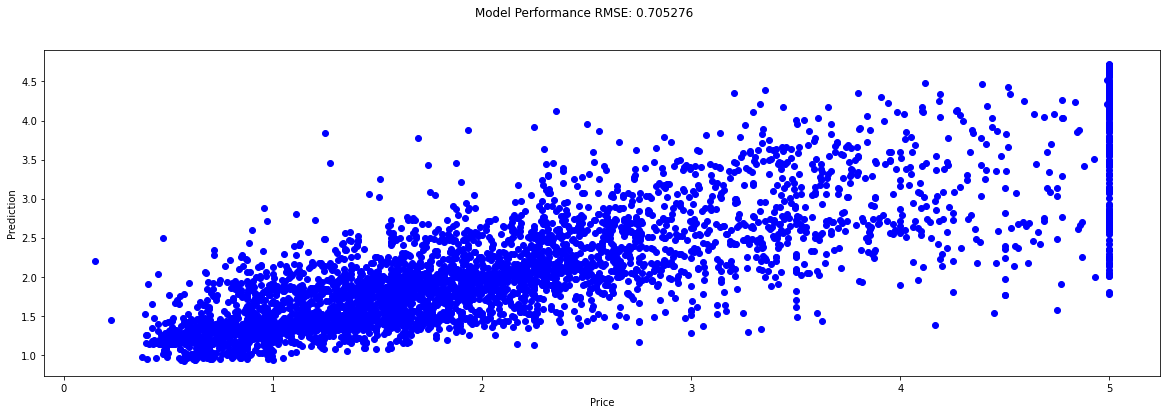

In [66]:
import matplotlib.pyplot as plt 
evaluator = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(rfr_predictions) 
rfPred = rfr_model.transform(test_data) 
rfResult = rfPred.toPandas() 
plt.figure(figsize=(20,6))
plt.plot(rfResult.label, rfResult.prediction, 'bo') 
plt.xlabel('Price') 
plt.ylabel('Prediction') 
plt.suptitle("Model Performance RMSE: %f" % rmse) 
plt.show()

In [67]:
rfr_model.getNumTrees

20

In [68]:
rfr_model.getOrDefault('maxDepth')

5